In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
t, g =smp.symbols('t, g')
m1, m2 =smp.symbols('m1, m2')
L1, L2 =smp.symbols('L1, L2')

In [3]:
θ1, θ2 =smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)

In [4]:
θ1=θ1(t)
θ2=θ2(t)

Defining derivatives and second derivatives

In [5]:
θ1_d = smp.diff(θ1,t)
θ2_d = smp.diff(θ2,t)
θ1_dd = smp.diff(θ1_d,t)
θ2_dd = smp.diff(θ2_d,t)

In [6]:
θ2_dd

Derivative(\theta_2(t), (t, 2))

Defining $x_1,y_1,x_2$ and $y_2$ in terms of $\theta_1$ and $\theta_2$

In [7]:
x1 = L1*smp.sin(θ1)
y1 = -L1*smp.cos(θ1)
x2 = L1*smp.sin(θ1) + L2*smp.sin(θ2)
y2 = -L1*smp.cos(θ1) - L2*smp.cos(θ2)

### Defining Kinetic and Potential energy to get the Lagrangian
The Lagrangian is
$$L=T-V$$
where 
$$T=\frac{1}{2}m_1(\dot{x}_1^2+\dot{y}_1^2)+\frac{1}{2}m_2(\dot{x}_2^2+\dot{y}_2^2)$$
and
$$V=m_1gy_1+m_2gy_2$$

In [8]:
# Kinetic energy
T1 = 1/2 * m1 * (smp.diff(x1,t)**2 + smp.diff(y1,t)**2)
T2 = 1/2 * m2 * (smp.diff(x2,t)**2 + smp.diff(y2,t)**2)
T = T1+T2

#Potential Energy
V1 = m1*g*y1
V2 = m2*g*y2
V = V1+V2

#Lagrangian
L = T-V

### Euler Lagrange equations

$$\frac{\partial L}{\partial \theta_1}-\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_1}=0$$

$$\frac{\partial L}{\partial \theta_2}-\frac{d}{dt}\frac{\partial L}{\partial \dot{\theta}_2}=0$$

In [9]:
#Deriving the LHS of Euler Lagrange equations
LE1 = smp.diff(L, θ1) - smp.diff(smp.diff(L, θ1_d), t).simplify()
LE2 = smp.diff(L, θ2) - smp.diff(smp.diff(L, θ2_d), t).simplify()

## Reducing eom in the form
$$\frac{d^2}{dt^2}\theta_1= ...$$
$$\frac{d^2}{dt^2}\theta_2= ...$$
where the RHS depends of derivatives of order less than 2.

In [10]:
sols = smp.solve([LE1, LE2], (θ1_dd, θ2_dd), simplify=False, rational=False)

In [11]:
# allowing the variables to take numerical values
dz1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,θ1,θ2,θ1_d,θ2_d), sols[θ1_dd])
dz2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,θ1,θ2,θ1_d,θ2_d), sols[θ2_dd])
dθ1dt_f = smp.lambdify(θ1_d, θ1_d)
dθ2dt_f = smp.lambdify(θ2_d, θ2_d)

## Solving eom

In [12]:
def dSdt(S, t, g, m1, m2, L1, L2):
    θ1, ω1, θ2, ω2 = S
    return [dθ1dt_f(ω1),
           dz1dt_f(t,g,m1,m2,L1,L2,θ1,θ2,ω1,ω2),
           dθ2dt_f(ω2),
           dz2dt_f(t,g,m1,m2,L1,L2,θ1,θ2,ω1,ω2)]

In [13]:
t = np.linspace(0, 0.1, 10000)
dt = t[1]-t[0]
g = 9.81
m1=1
m2=4
L1=1
L2=2

θ1_ini=160*np.pi/180
θ2_ini=175*np.pi/180
δθ2=0.01*np.pi/180

sol1 = odeint(dSdt, y0=[θ1_ini,0,θ2_ini,0], t=t, args=(g, m1, m2, L1, L2))
sol2 = odeint(dSdt, y0=[θ1_ini,0,θ2_ini+δθ2,0], t=t, args=(g, m1, m2, L1, L2))

In [14]:
θa1_t = sol1.T[0]
ωa1_t = sol1.T[1]
θa2_t = sol1.T[2]
ωa2_t = sol1.T[3]

θb1_t = sol2.T[0]
ωb1_t = sol2.T[1]
θb2_t = sol2.T[2]
ωb2_t = sol2.T[3]

In [15]:
Δθ= np.sqrt((θb1_t-θa1_t)**2 + (θb2_t-θa2_t)**2 + (ωb1_t-ωa1_t)**2 + (ωb2_t-ωa2_t)**2)*(180/np.pi)  #converted in degrees

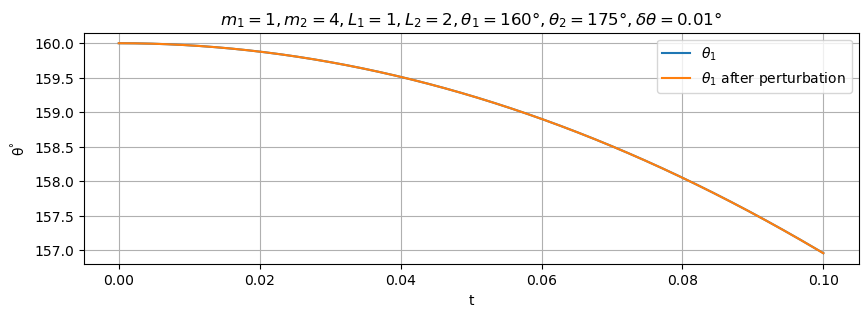

In [16]:
plt.figure(figsize=(10,3))
plt.plot(t, θa1_t*(180/np.pi),label='$θ_1$')
# plt.plot(t, θa2_t)
plt.plot(t, θb1_t*(180/np.pi),label='$θ_1$ after perturbation')
plt.xlabel(r'θ\degree')
plt.title(r'$m_1=1,m_2=4,L_1=1,L_2=2,θ_1=160\degree,θ_2=175\degree,\delta θ=0.01\degree $')
# plt.plot(t, θb2_t)
plt.xlabel('t')
plt.ylabel('θ$^\degree$')
plt.legend()
plt.grid()

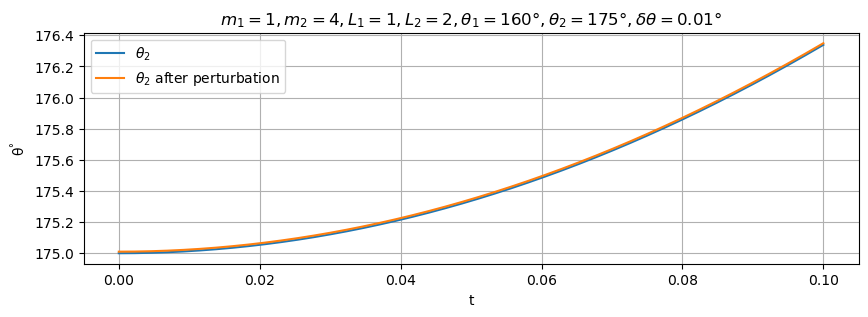

In [17]:
plt.figure(figsize=(10,3))
plt.plot(t, θa2_t*(180/np.pi),label='$θ_2$')
plt.plot(t, θb2_t*(180/np.pi),label='$θ_2$ after perturbation')
plt.xlabel(r'θ\degree')
plt.title(r'$m_1=1,m_2=4,L_1=1,L_2=2,θ_1=160\degree,θ_2=175\degree,\delta θ=0.01\degree $')
plt.xlabel('t')
plt.ylabel('θ$^\degree$')
plt.legend()
plt.grid()

## Lyapunov exponent

In [18]:
λ, A=np.polyfit(t,np.log(Δθ),1)

In [19]:
np.log(Δθ)

array([-4.60517019, -4.60517017, -4.60517013, ..., -4.12140677,
       -4.1213843 , -4.12136183])

In [20]:
np.exp(A)

0.009627331352957671

In [21]:
fit=np.exp(A)*np.exp(λ*t)

In [22]:
λ

5.594296619857387

In [23]:
MSE=(1/len(t))*np.sum((fit-Δθ)**2)

In [24]:
MSE

4.1233831156942407e-08

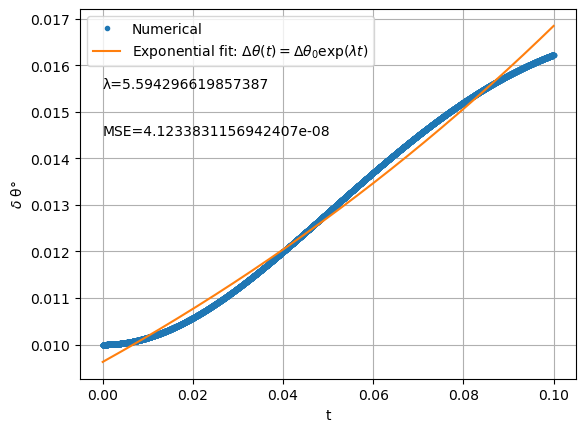

In [25]:
plt.plot(t, Δθ,'.',label='Numerical')
plt.plot(t, fit, label='Exponential fit: $\Delta θ(t)=\Delta θ_0\exp(\lambda t)$')
plt.xlabel('t')
plt.ylabel('$\delta$ θ$\degree$')
plt.text(0,0.0155, 'λ='+str(λ), fontsize = 10)
plt.text(0,0.0145, 'MSE='+str(MSE), fontsize = 10)
plt.grid()
plt.legend()
plt.show()

## Hamiltonian of the system

In [26]:
x_1 = L1*np.sin(θa1_t)
y_1 = -L1*np.cos(θa1_t)
x_2 = L1*np.sin(θa1_t) + L2*np.sin(θa2_t)
y_2 = -L1*np.cos(θa1_t) - L2*np.cos(θa2_t)
d_x1 = L1*np.cos(θa1_t)*ωa1_t
d_y1 = L1*np.sin(θa1_t)*ωa1_t
d_x2 = L1*np.cos(θa1_t)*ωa1_t + L2*np.cos(θa2_t)*ωa2_t
d_y2 = L1*np.sin(θa1_t)*ωa1_t + L2*np.sin(θa2_t)*ωa2_t

In [27]:
KE = (m1/2) * (d_x1**2 + d_y1**2) + (m2/2) * (d_x2**2 + d_y2**2)
PE = m1*g*y_1 + m2*g*y_2

In [31]:
H = KE + PE

In [28]:
Initial_energy=m1*g*y_1[0] + m2*g*y_2[0]

In [29]:
Initial_energy

124.27328295578899

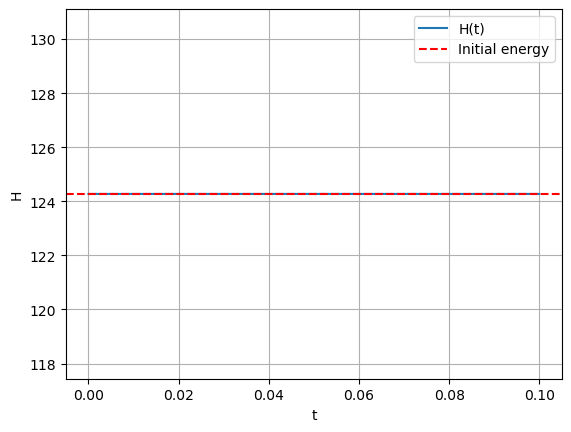

In [32]:
plt.plot(t,np.round(H,3),label='H(t)')
plt.axhline(y = Initial_energy, color = 'r', linestyle = '--',label='Initial energy')
plt.xlabel('t')
plt.ylabel('H')
plt.legend()
plt.grid()
plt.show()
# plt.xlim(0,1)